## <font color='lightblue'>Lab Enhancement : Lab07 Linear Regression </font>

## Overview of Original Lab

#### 1.Simple Linear Regression with Scikit-learn
#### 2.Multiple Linear Regression with Scikit-learn
#### 3.Polynomial Regression with Scikit-learn
#### 4.Advanced Linear Regression with Statsmodels

## What was lacking in the Original Lab?

#### 1.Overview and Summarization
#### 2.Direct Comparison Between Approaches 
#### 3.Real World Example and objectives.
#### 4.Clear 


## What is added and improved in Enhanced Lab?

#### 1.Overview and Summarization
#### 2.Comparison Between Approaches
#### 3.Enhanced look for each Regression Approaches
#### 4.Extra added visuals to the plotting graphs of each regression models.
#### 5.Evaluation of all approaches involved
#### 6.Conclusion to clarify the comparison and the results.


## Structure of Enhanced Lab Notebook

#### 1.Overview and Summarization
#### 2.Simple Linear Regression
#### 3.Multiple Linear Regression
#### 4.Polynomial Regression
#### 5.Advanced Linear Regression with Statsmodels
#### 6.Comparison Section
#### 7.Conclusion

# Overview and Summarization 



## **Regression Techniques Overview**

### 1. **Simple Linear Regression**
#### **Definition**:
Simple Linear Regression models the relationship between one independent variable (predictor) and one dependent variable (outcome) as a straight line. 

#### **When to Use**:
- When there is a single predictor variable.
- The relationship between the variables appears linear.

#### **Applications**:
- Predicting house prices based on size.
- Estimating sales growth based on advertising spend.

---

### 2. **Multiple Linear Regression**
#### **Definition**:
Multiple Linear Regression extends Simple Linear Regression by incorporating multiple independent variables to predict a single dependent variable.



#### **When to Use**:
- When the dependent variable is influenced by several factors.
- To improve prediction accuracy by considering multiple variables.

#### **Applications**:
- Predicting housing prices based on size, location, and number of rooms.
- Estimating medical costs based on age, BMI, and smoking habits.

---

### 3. **Polynomial Regression**
#### **Definition**:
Polynomial Regression captures non-linear relationships by including polynomial terms of the independent variables. It is still considered a type of linear regression because the model is linear in terms of the coefficients.


#### **When to Use**:
- When data shows a non-linear trend that cannot be captured by a straight line.
- To improve model fit for curved relationships.

#### **Applications**:
- Modeling population growth over time.
- Predicting stock price trends with non-linear patterns.

---

### 4. **Advanced Linear Regression with Statsmodels**
#### **Definition**:
Statsmodels provides an in-depth statistical analysis of regression models, offering detailed information about coefficients, p-values, confidence intervals, and more.

#### **How It Works**:
- Fits a regression model and performs hypothesis testing on coefficients.
- Provides a summary report for in-depth model diagnostics.

#### **When to Use**:
- When you need detailed statistical insights about your regression model.
- To assess the significance and reliability of predictors.

#### **Applications**:
- Academic research requiring statistical rigor.
- Evaluating the effect of multiple interventions in medical studies.

## <font color='lightblue'>Mount Google Drive</font>

In [ ]:
# Uncomment the below if you need to read data from your Google Drive
# Change the notebook_path to where you run the Jupyter Notebook from.

# from google.colab import drive
# import os

# drive.mount('/content/drive')

# notebook_path = r"/content/drive/MyDrive//ML/Demo"
# os.chdir(notebook_path)
# !pwd

## <font color='lightblue'>Import Libraries</font>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [11]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = np.random.rand(100, 1) * 10  # Feature
y = 3.5 * X + np.random.randn(100, 1) * 3  # Target variable with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot settings
import seaborn as sns
sns.set(style="whitegrid")

# Helper function to plot results
def plot_regression_results(x, y, y_pred, title, xlabel="Feature", ylabel="Target"):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color="blue", label="Data")
    plt.plot(x, y_pred, color="red", label="Prediction")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

## <font color='lightblue'>Simple Linear Regression with Scikit-learn</font>

Simple Linear Regression:
Mean Squared Error: 5.88
R-squared: 0.95


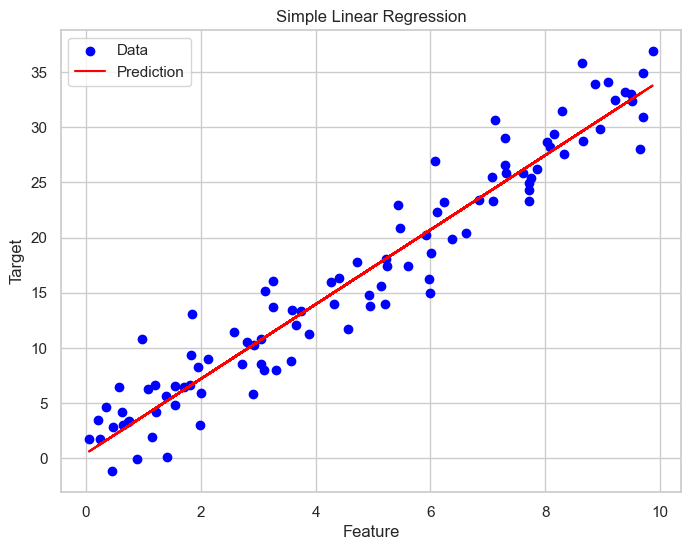

In [12]:
# Simple Linear Regression
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_simple = simple_model.predict(X_test)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

# Display results
print("Simple Linear Regression:")
print(f"Mean Squared Error: {mse_simple:.2f}")
print(f"R-squared: {r2_simple:.2f}")

# Plot regression results
plot_regression_results(X, y, simple_model.predict(X), "Simple Linear Regression")

## <font color='lightblue'>Multiple Linear Regression with Scikit-Learn</font>

In [13]:
# Generate synthetic data for multiple features
X_multi = np.random.rand(100, 3) * 10  # Three features
y_multi = 2.5 * X_multi[:, 0] + 1.5 * X_multi[:, 1] - 0.8 * X_multi[:, 2] + np.random.randn(100) * 2

# Split data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train Multiple Linear Regression
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Predict and evaluate
y_pred_multi = multi_model.predict(X_test_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

# Display results
print("\nMultiple Linear Regression:")
print(f"Mean Squared Error: {mse_multi:.2f}")
print(f"R-squared: {r2_multi:.2f}")
print("Coefficients:", multi_model.coef_)
print("Intercept:", multi_model.intercept_)


Multiple Linear Regression:
Mean Squared Error: 6.34
R-squared: 0.89
Coefficients: [ 2.51392255  1.56904233 -0.77225598]
Intercept: -0.5707929491357167


## <font color='lightblue'>Polynomial Regression with Scikit-Learn</font>


Polynomial Regression:
Mean Squared Error: 5.72
R-squared: 0.95


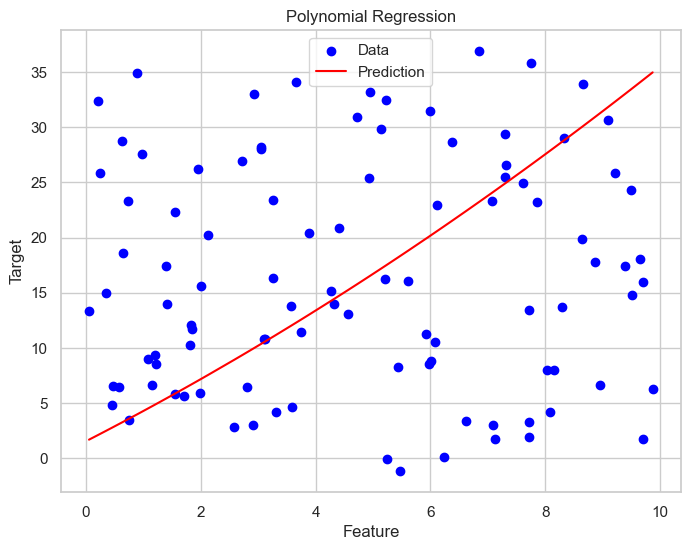

In [7]:
# Transform data with Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split transformed data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

# Display results
print("\nPolynomial Regression:")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")

# Plot Polynomial Regression curve
X_sorted = np.sort(X, axis=0)
y_poly_pred = poly_model.predict(poly.transform(X_sorted))
plot_regression_results(X_sorted, y, y_poly_pred, "Polynomial Regression")

## <font color='lightblue'>Advanced Linear Regression with Statsmodels</font>

In [14]:
# Fit a regression model with Statsmodels
X_train_sm = sm.add_constant(X_train)  # Add constant term for the intercept
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Summary of the model
print("\nAdvanced Linear Regression with Statsmodels:")
print(model_sm.summary())

# Predict and evaluate
X_test_sm = sm.add_constant(X_test)
y_pred_sm = model_sm.predict(X_test_sm)

mse_sm = mean_squared_error(y_test, y_pred_sm)
r2_sm = r2_score(y_test, y_pred_sm)

print(f"\nMean Squared Error: {mse_sm:.2f}")
print(f"R-squared: {r2_sm:.2f}")



Advanced Linear Regression with Statsmodels:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     990.5
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           4.37e-46
Time:                        23:30:43   Log-Likelihood:                -194.79
No. Observations:                  80   AIC:                             393.6
Df Residuals:                      78   BIC:                             398.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

## <font color='lightblue'>Comparison of All Methods</font>

In [15]:
# Compile results for comparison
results = pd.DataFrame({
    "Model": ["Simple Linear Regression", "Multiple Linear Regression", "Polynomial Regression", "Advanced Linear Regression"],
    "Mean Squared Error": [mse_simple, mse_multi, mse_poly, mse_sm],
    "R-squared": [r2_simple, r2_multi, r2_poly, r2_sm]
})

# Display comparison
print("\nComparison of Regression Models:")
print(results)



Comparison of Regression Models:
                        Model  Mean Squared Error  R-squared
0    Simple Linear Regression            5.883296   0.947760
1  Multiple Linear Regression            6.338280   0.891108
2       Polynomial Regression            5.722565   0.949187
3  Advanced Linear Regression            5.883296   0.947760


## <font color='lightblue'>Conclusion</font>

#### Based on the comparison , Simple Linear Regressions and Advanced Linear Regression both have identicial results with a MSE of 5.88 and R-Squared value of 0.948 . The results are identical because they are solving the same mathematical optimization problem. 

#### Advanced Linear Regression provides more insights.In summary using Simple Linear Regression is practical while Advanced Linear Regression should be used when deeper statistical diagnostics are needed